In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

In [25]:
data = np.array([[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]])

original


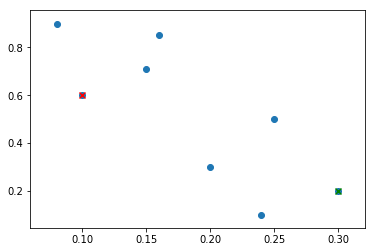

In [26]:
c1 = [0.1, 0.6]
c2 = [0.3, 0.2]
centers = np.array([c1, c2])
plt.scatter(data[:,0], data[:,1])
plt.scatter(c1[0], c1[1], marker='x', c='r')
plt.scatter(c2[0], c2[1], marker = 'x', c = 'g')
print "original"

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, init=centers).fit(data)

In [28]:
print kmeans.cluster_centers_
kmeans.labels_

[[0.148      0.712     ]
 [0.24666667 0.2       ]]


array([0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [29]:
colors = {1 : "r", 0 : "g"}

In [30]:
centers_new = deepcopy(centers)
centers_old = np.zeros(centers.shape)
distances = np.zeros((len(data), 2))
clusters = np.zeros(len(data))

In [31]:
error = np.linalg.norm(centers_new - centers_old)

In [32]:
print error

0.7071067811865476


1. np.linalg.norm() -> calculates the distance by using the root(sum(x-y)^2) formula.
2. on axis = 1 means row wise, so example data = [[1,2], [2,3]] and centers =[[1,2],[0,1]] so it will calculate distance row wise for data i.e. [1,2] first then [2,3] with each center point 
3. np.mean(data[clusters==i]) returns all data with clusters assigned as 0 / 1 and returns mean accordingly. Axis = 0  means that the mean is calculated column wise so if data = [[1,2],[2,3]] then mean = [(1 + 2)/2, (2 + 3)/2] 
4. np.argmin returns the index of the minimum element. For us index = cluster only. If lowest index is 0 that means cluster is also 0 and if lowest index =1 cluster = 1

In [33]:
while error!=0:
    for i in range(2):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis = 1)
    clusters = np.argmin(distances, axis = 1)
    centers_old = deepcopy(centers_new)
    for i in range(2):
        centers_new[i] = np.mean(data[clusters==i], axis = 0)
    error = np.linalg.norm(centers_new - centers_old)
print centers_new

[[0.148      0.712     ]
 [0.24666667 0.2       ]]


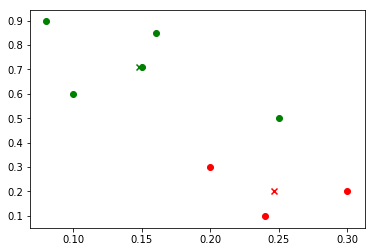

In [34]:
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], c=colors[clusters[i]])
    
for i in range(2):
    plt.scatter(centers_new[i][0], centers_new[i][1], c=colors[i], marker = 'x')


In [35]:
print clusters

[0 0 0 0 1 0 1 1]


In [36]:
print centers
centers_new = deepcopy(centers)
print centers_new
centers_old = np.zeros(centers.shape)
print centers_old
error =  np.linalg.norm(centers_new - centers_old)

[[0.1 0.6]
 [0.3 0.2]]
[[0.1 0.6]
 [0.3 0.2]]
[[0. 0.]
 [0. 0.]]


In [37]:
print error

0.7071067811865476


In [38]:
while error!=0:
    for i in range(2):
        distances[:,i] = np.linalg.norm(data - centers[i], axis = 1)
    clusters = np.argmin(distances, axis = 1)
    centers_old = centers_new
    for i in range(2):
        centers_new[i] = np.mean(data[clusters==i], axis =0)
    error = np.linalg.norm(centers_old - centers_new)

In [39]:
print error

0.0


In [40]:
print centers_new

[[0.148      0.712     ]
 [0.24666667 0.2       ]]


In [64]:
centers_new = deepcopy(centers)

In [65]:
centers_old = np.zeros(centers.shape)

In [66]:
clusters = np.zeros(len(data))

In [67]:
distances = np.zeros((len(data), 2))

In [68]:
error = np.linalg.norm(centers_new - centers_old)

In [69]:
print error

0.7071067811865476


In [70]:
while error!=0:
    for i in range(2):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis = 1)
    clusters = np.argmin(distances, axis =1)
    centers_old = deepcopy(centers_new)
    for i in range(2):
        centers_new[i] = np.mean(data[clusters==i], axis =0)
    error = np.linalg.norm(centers_new - centers_old)

0.7071067811865476
0.1330129484089592
